In [ ]:
#import libraries for nerualnet, math and visualization
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
print(tf.__version__)
from PIL import Image

from keras.models import Model
from keras.models import load_model
from keras import callbacks 
import cv2 

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
my_file = open('/content/drive/MyDrive/113db_project/plate_label.txt', 'r')
#read text file into list
data = my_file.read()
label=[]
label.extend(data)

my_test_file = open('/content/drive/MyDrive/113db_project/test_label.txt', 'r')
#read text file into list
test_data = my_test_file.read()
test_label=[]
test_label.extend(test_data)

In [ ]:
#set seed just for the demonstration
tf.random.set_seed(1000);
#load in the dataset for training and testing
#(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
conversion=['0','1', '2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
###########['0','1', '2','3','4','5','6','7','8','9', 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

train_labels=[]
for j in range(0,2052):#2773
  for i in range(0, 7):
    for k in range(0,36):
      if conversion[k]==label[i+j*8]:
        train_labels.append(k)

train_labels=np.reshape(train_labels,(2052,7))#2773
print(train_labels[0,:])

train_images=[]
for i in range(1,2053):#0,2053
    img_name = '/content/drive/MyDrive/113db_project/plate ('+str(i)+').png'
    img = tf.io.read_file(img_name)
    img = tf.io.decode_image(img,0)
    #img = img/255
    img = np.reshape(img, (31, 104, 3))
    train_images.append(img[:,:,0])

#for i in range(2053,2774):#2053,2774
#    img_name = '/content/drive/MyDrive/113db_project/'+str(i)+'.png'
#    img = tf.io.read_file(img_name)
#    img = tf.io.decode_image(img,0)
#    #img = img/255
#    img = np.reshape(img, (31, 104, 3))
#    train_images.append(img[:,:,0])

test_labels=[]
for j in range(0,20):
  for i in range(0, 7):
    for k in range(0,36):
      if conversion[k]==test_label[i+j*8]:
        test_labels.append(k)

test_labels=np.reshape(test_labels,(20,7))
print(test_labels[0,:])

test_images=[]
for i in range(1,21):
    img_name = '/content/drive/MyDrive/113db_project/test ('+str(i)+').png'
    img = tf.io.read_file(img_name)
    img = tf.io.decode_image(img,0)
    #img = img/255
    img = np.reshape(img, (31, 104))
    test_images.append(img)

print(train_images[0])
print(test_images[0])

[ 5 16 15 13  1  1  7]
[ 3 21 17 19  7  4  1]
[[112 145 148 ... 189 185 186]
 [116 151 151 ... 205 201 200]
 [122 160 157 ... 226 219 214]
 ...
 [171 191 195 ... 238 241 232]
 [171 192 197 ... 239 243 231]
 [172 194 198 ... 240 246 230]]
[[ 39  65 108 ...  50  53  41]
 [ 41  67 110 ...  47  51  38]
 [ 40  66 109 ...  50  54  41]
 ...
 [ 36  69 117 ...  48  47  33]
 [ 33  66 114 ...  48  45  31]
 [ 28  61 111 ...  47  44  30]]


/////////////////////////////////////train image////////////////////////////////////


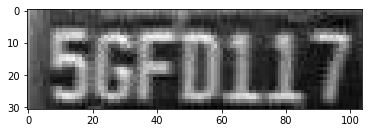

[ 5 16 15 13  1  1  7]


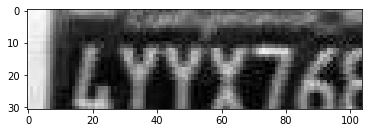

[ 4 34 34 33  7  6  8]


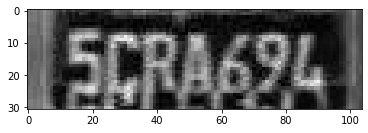

[ 5 12 27 10  6  9  4]


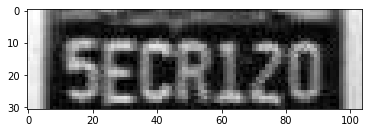

[ 5 14 12 27  1  2  0]


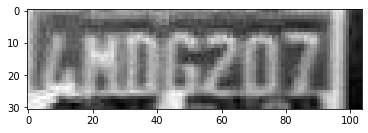

[ 4 22 13 16  2  0  7]


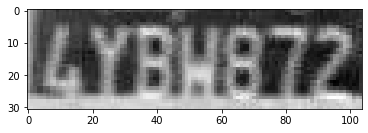

[ 4 34 11 32  8  7  2]


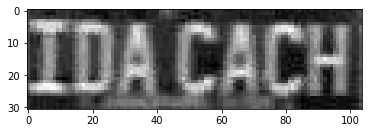

[18 13 10 12 10 12 17]


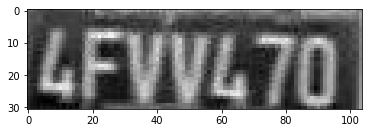

[ 4 15 31 31  4  7  0]


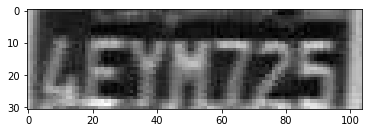

[ 4 15 34 22  7  2  5]


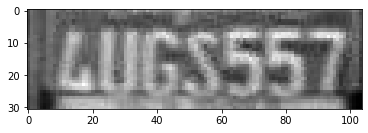

[ 4 30 16 28  5  5  7]
//////////////////////////////////////test image///////////////////////////////////////


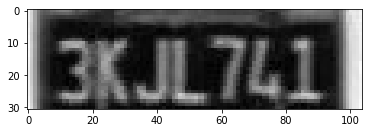

[ 3 21 17 19  7  4  1]


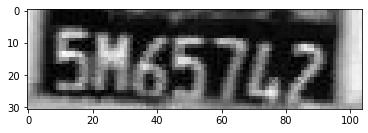

[ 5 22  6  5  7  4  2]


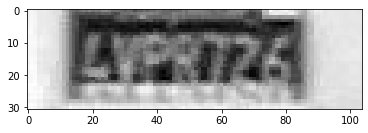

[ 4 31 25 27  7  2  6]


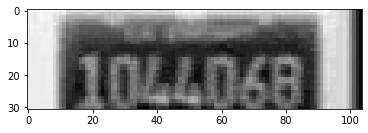

[1 0 4 4 0 6 8]


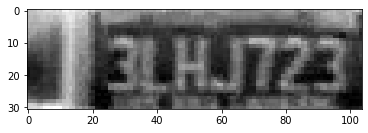

[ 3 21 17 19  7  2  3]


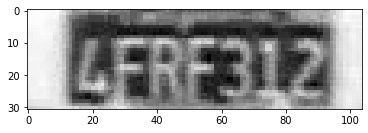

[ 4 15 27 15  3  1  2]


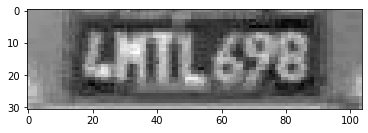

[ 4 22 18 21  6  9  8]


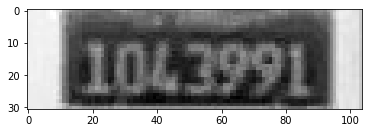

[1 0 4 3 9 9 1]


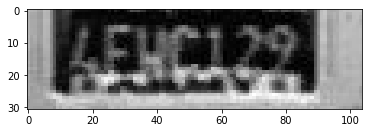

[ 4 15 32 12  1  2  9]


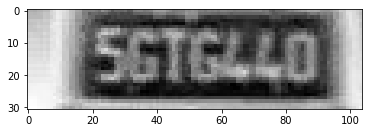

[ 5 16 29 16  4  4  0]


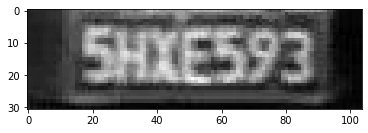

[ 5 17 33 14  5  9  3]


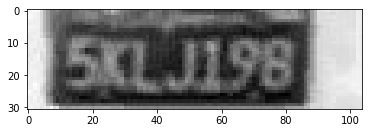

[ 5 20 21 19  1  9  8]


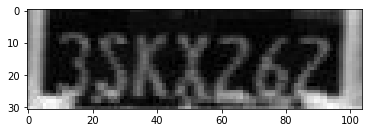

[ 3 28 20 33  2  6  2]


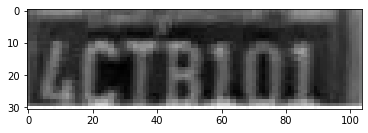

[ 4 12 29 11  1  0  1]


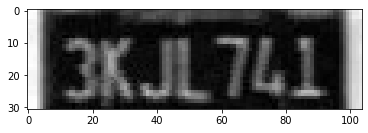

[ 3 20 19 21  7  4  1]


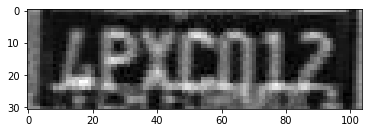

[ 4 25 33 12  0  1  2]


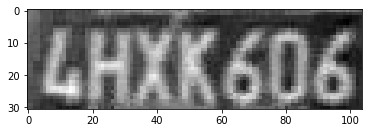

[ 4 17 33 20  6  0  6]


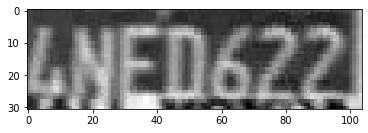

[ 4 23 14 13  6  2  2]


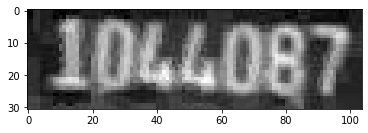

[1 0 4 4 0 8 7]


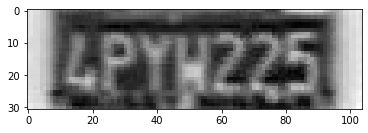

[ 4 25 34 32  2  2  5]


In [ ]:
#Plot an image to see what it looks like
print("/////////////////////////////////////train image////////////////////////////////////")
for i in range(0,10):
  plt.figure()
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  #plt.imshow(img,cmap=plt.cm.binary)
  plt.grid(False)
  plt.show()

  print(train_labels[i,:])


print("//////////////////////////////////////test image///////////////////////////////////////")
for i in range(0,20):
  plt.figure()
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  #plt.imshow(img,cmap=plt.cm.binary)
  plt.grid(False)
  plt.show()

  print(test_labels[i,:])

In [ ]:
#TODO: Modify the CNN structure for a slimer network
#Build the neuralnet model
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 104, 1), padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.BatchNormalization())
#model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(74, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(36, activation='sigmoid'))

imgshape=(31,104,1)

def createmodel():
    img = layers.Input(shape=imgshape)  # Get image as an input of size 31,104,1
    conv1 = layers.Conv2D(8, (3, 3), padding='same', input_shape=(31, 104, 1) ,activation='relu')(img) #31*104
    #b1 = layers.BatchNormalization()(conv1)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)

    conv2 = layers.Conv2D(8, (3, 3), padding='same', activation='relu')(mp1)
    #b2 = layers.BatchNormalization()(conv2)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)

    conv3 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(mp2)
    b3 = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(b3)

    flat = layers.Flatten()(mp3)

    outs = []
    for _ in range(7): #for 7 letters of Car plate
        dens1 = layers.Dense(32, activation='relu')(flat)
        drop1 = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes

        #res = layers.Dense(36, activation='softmax', kernel_regularizer='l1')(drop)
        res = layers.Dense(36, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.07))(drop1)

        outs.append(res) #result of layers

    model = Model(img, outs) 
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [ ]:
#Review the overall model structure
model=createmodel();
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 31, 104, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 31, 104, 8)   80          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 52, 8)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 16, 52, 8)    584         ['max_pooling2d[0][0]']      

In [ ]:
#Reshape the image so it can train in batch (and fit the model's input shape)
train_images = np.array(train_images).reshape((2052, 31, 104, 1))#2773
train1 = tf.one_hot(train_labels[:,0], 36)
train2 = tf.one_hot(train_labels[:,1], 36)
train3 = tf.one_hot(train_labels[:,2], 36)
train4 = tf.one_hot(train_labels[:,3], 36)
train5 = tf.one_hot(train_labels[:,4], 36)
train6 = tf.one_hot(train_labels[:,5], 36)
train7 = tf.one_hot(train_labels[:,6], 36)

In [ ]:
#Training the model
#Hint: change optimizer to 'sgd', and increase epochs if result is bad.
#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

hist=model.fit(train_images, [train1,train2,train3,train4,train5,train6,train7],validation_split = 0.1,epochs=70,batch_size=48)
#,validation_split = 0.1,batch_size=48

Epoch 1/70
39/39 [==============================] - 7s 40ms/step - loss: 101.0217 - dense_1_loss: 2.9687 - dense_3_loss: 3.7735 - dense_5_loss: 3.7827 - dense_7_loss: 3.7714 - dense_9_loss: 3.7075 - dense_11_loss: 3.5926 - dense_13_loss: 3.5661 - dense_1_accuracy: 0.2660 - dense_3_accuracy: 0.0488 - dense_5_accuracy: 0.0358 - dense_7_accuracy: 0.0330 - dense_9_accuracy: 0.0677 - dense_11_accuracy: 0.0791 - dense_13_accuracy: 0.0758 - val_loss: 88.5721 - val_dense_1_loss: 2.2015 - val_dense_3_loss: 3.5649 - val_dense_5_loss: 3.5842 - val_dense_7_loss: 3.5708 - val_dense_9_loss: 3.2907 - val_dense_11_loss: 3.2814 - val_dense_13_loss: 3.0951 - val_dense_1_accuracy: 0.4272 - val_dense_3_accuracy: 0.0437 - val_dense_5_accuracy: 0.0146 - val_dense_7_accuracy: 0.0485 - val_dense_9_accuracy: 0.1165 - val_dense_11_accuracy: 0.0922 - val_dense_13_accuracy: 0.0971
Epoch 2/70
39/39 [==============================] - 0s 12ms/step - loss: 80.4130 - dense_1_loss: 2.3298 - dense_3_loss: 3.5551 - dense

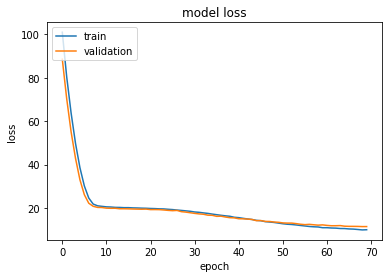

In [ ]:
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

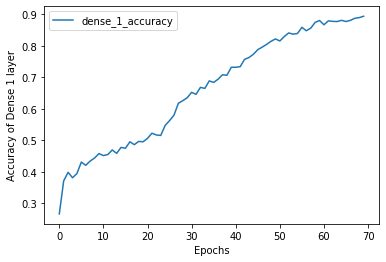

In [ ]:
for label in ["dense_1_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

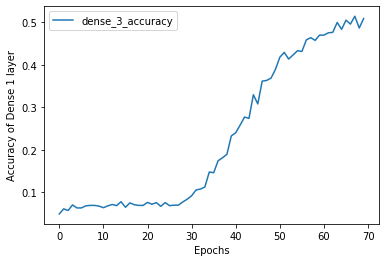

In [ ]:
for label in ["dense_3_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

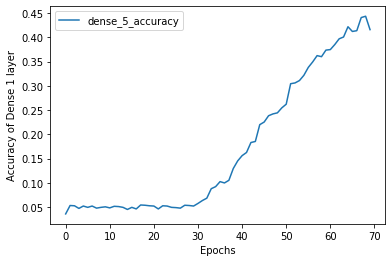

In [ ]:
for label in ["dense_5_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

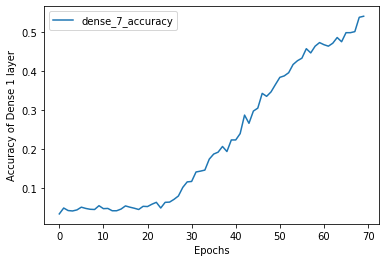

In [ ]:
for label in ["dense_7_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

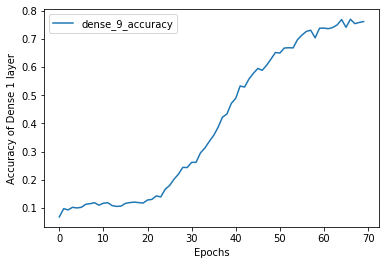

In [ ]:
for label in ["dense_9_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

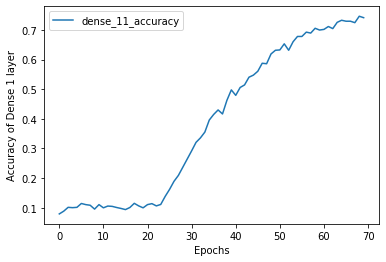

In [ ]:
for label in ["dense_11_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

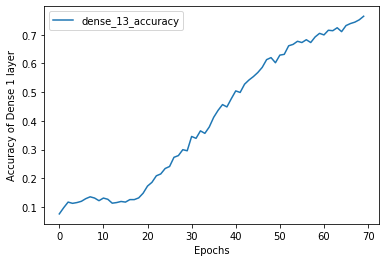

In [ ]:
for label in ["dense_13_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

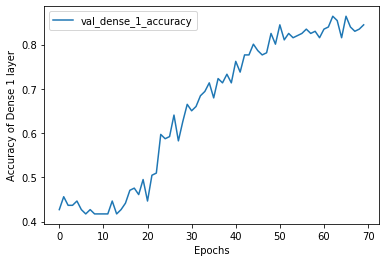

In [ ]:
for label in ["val_dense_1_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

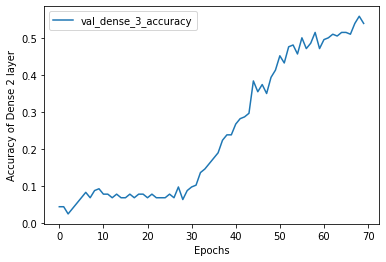

In [ ]:
for label in ["val_dense_3_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

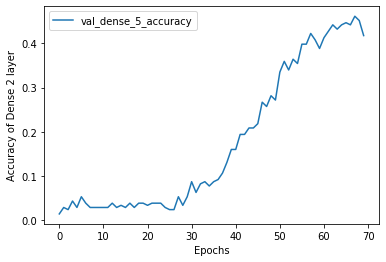

In [ ]:
for label in ["val_dense_5_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

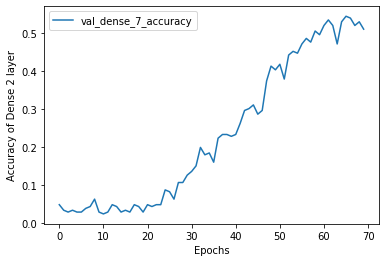

In [ ]:
for label in ["val_dense_7_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

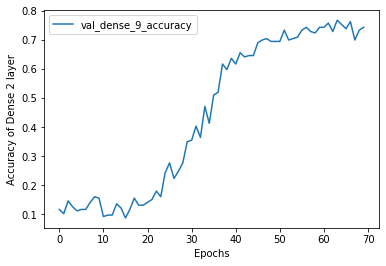

In [ ]:
for label in ["val_dense_9_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

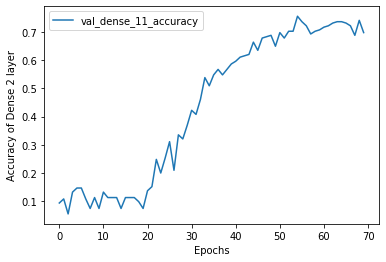

In [ ]:
for label in ["val_dense_11_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

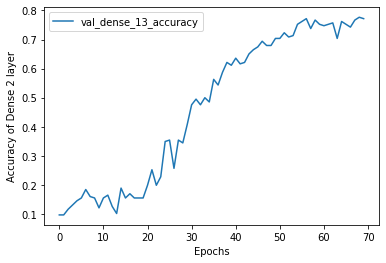

In [ ]:
for label in ["val_dense_13_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

In [ ]:
#Evaluate the performance with testing dataset
test_images = np.array(test_images).reshape((20, 31, 104, 1))
label1 = tf.one_hot(test_labels[:,0], 36)
label2 = tf.one_hot(test_labels[:,1], 36)
label3 = tf.one_hot(test_labels[:,2], 36)
label4 = tf.one_hot(test_labels[:,3], 36)
label5 = tf.one_hot(test_labels[:,4], 36)
label6 = tf.one_hot(test_labels[:,5], 36)
label7 = tf.one_hot(test_labels[:,6], 36)

print("Accuracy of this model is:")
model.evaluate(test_images, [label1,label2,label3,label4,label5,label6,label7])
model.predict(test_images)
r0,r1,r2,r3,r4,r5,r6=model.predict(test_images)
conversion=['0','1', '2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
number=[]
for k in range(20):
  temp=max(r0[k])
  for i in range(36):
    if temp==r0[k][i]:
      number.append(conversion[i])

  temp=max(r1[k])
  for i in range(36):
    if temp==r1[k][i]:
     number.append(conversion[i])

  temp=max(r2[k])
  for i in range(36):
    if temp==r2[k][i]:
      number.append(conversion[i])

  temp=max(r3[k])
  for i in range(36):
    if temp==r3[k][i]:
       number.append(conversion[i])

  temp=max(r4[k])
  for i in range(36):
    if temp==r4[k][i]:
       number.append(conversion[i])

  temp=max(r5[k])
  for i in range(36):
    if temp==r5[k][i]:
      number.append(conversion[i])

  temp=max(r6[k])
  for i in range(36):
     if temp==r6[k][i]:
       number.append(conversion[i])

  print(number)
  
  for i in range(7):
    number.pop()

Accuracy of this model is:
1/1 [==============================] - 0s 92ms/step - loss: 14.7778 - dense_1_loss: 0.8979 - dense_3_loss: 2.8107 - dense_5_loss: 2.7752 - dense_7_loss: 2.5124 - dense_9_loss: 1.7626 - dense_11_loss: 0.8926 - dense_13_loss: 1.1398 - dense_1_accuracy: 0.7000 - dense_3_accuracy: 0.2500 - dense_5_accuracy: 0.2000 - dense_7_accuracy: 0.3500 - dense_9_accuracy: 0.6000 - dense_11_accuracy: 0.6500 - dense_13_accuracy: 0.5500
['3', 'K', 'J', 'L', '7', '4', '1']
['5', 'U', 'K', 'M', '7', '4', '2']
['4', 'R', 'F', 'F', '2', '6', '9']
['4', 'X', 'S', 'Z', '3', '7', '3']
['5', 'E', 'K', 'H', '4', '2', '2']
['4', 'C', 'A', 'T', '3', '5', '2']
['4', 'M', 'K', 'E', '6', '9', '0']
['4', 'J', 'C', 'A', '9', '9', '8']
['4', 'G', 'W', 'X', '6', '8', '4']
['5', 'F', 'V', 'H', '4', '4', '0']
['5', 'M', 'K', 'X', '3', '9', '7']
['4', 'S', 'I', 'V', '8', '8', '0']
['3', 'S', 'I', 'X', '9', '6', '2']
['4', 'R', 'Y', 'A', '1', '0', '1']
['5', 'K', 'J', 'L', '7', '4', '1']
['4', 'G', 

In [ ]:
#Reshape the image so it can train in batch (and fit the model's input shape)
train_images = np.array(train_images).reshape((2052, 31, 104, 1))#2773
train1 = tf.one_hot(train_labels[:,0], 36)
train2 = tf.one_hot(train_labels[:,1], 36)
train3 = tf.one_hot(train_labels[:,2], 36)
train4 = tf.one_hot(train_labels[:,3], 36)
train5 = tf.one_hot(train_labels[:,4], 36)
train6 = tf.one_hot(train_labels[:,5], 36)
train7 = tf.one_hot(train_labels[:,6], 36)

print("Accuracy of this model is:")
test_hist=model.evaluate(train_images, [train1,train2,train3,train4,train5,train6,train7])
model.predict(train_images)
r0,r1,r2,r3,r4,r5,r6=model.predict(train_images)
conversion=['0','1', '2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
number=[]
y_pred1=[]
y_pred2=[]
y_pred3=[]
y_pred4=[]
y_pred5=[]
y_pred6=[]
y_pred7=[]
for k in range(2052):#2052
  temp=max(r0[k])
  #print(r0[k])
  #print(temp)
  for i in range(36):
    if temp==r0[k][i]:
      number.append(conversion[i])
      y_pred1.append(i)

  temp=max(r1[k])
  for i in range(36):
    if temp==r1[k][i]:
     number.append(conversion[i])
     y_pred2.append(i)

  temp=max(r2[k])
  for i in range(36):
    if temp==r2[k][i]:
      number.append(conversion[i])
      y_pred3.append(i)

  temp=max(r3[k])
  for i in range(36):
    if temp==r3[k][i]:
       number.append(conversion[i])
       y_pred4.append(i)

  temp=max(r4[k])
  for i in range(36):
    if temp==r4[k][i]:
       number.append(conversion[i])
       y_pred5.append(i)

  temp=max(r5[k])
  for i in range(36):
    if temp==r5[k][i]:
      number.append(conversion[i])
      y_pred6.append(i)

  temp=max(r6[k])
  #print(r6[k])
  #print(temp)
  for i in range(36):
     if temp==r6[k][i]:
       number.append(conversion[i])
       y_pred7.append(i)
  print(number)
  print(k)

  for i in range(7):
    number.pop()

Accuracy of this model is:
65/65 [==============================] - 1s 9ms/step - loss: 6.7054 - dense_1_loss: 0.2101 - dense_3_loss: 1.0458 - dense_5_loss: 1.3909 - dense_7_loss: 1.0773 - dense_9_loss: 0.3024 - dense_11_loss: 0.3760 - dense_13_loss: 0.3162 - dense_1_accuracy: 0.9591 - dense_3_accuracy: 0.8289 - dense_5_accuracy: 0.7671 - dense_7_accuracy: 0.8460 - dense_9_accuracy: 0.9488 - dense_11_accuracy: 0.9284 - dense_13_accuracy: 0.9493
['5', 'G', 'F', 'D', '1', '1', '7']
0
['4', 'Y', 'Y', 'X', '7', '6', '8']
1
['5', 'C', 'R', 'A', '6', '9', '4']
2
['5', 'E', 'C', 'R', '1', '2', '0']
3
['4', 'M', 'D', 'G', '2', '0', '7']
4
['4', 'Y', 'D', 'W', '8', '7', '2']
5
['4', 'D', 'A', 'C', '9', '0', '5']
6
['4', 'F', 'V', 'V', '4', '7', '0']
7
['4', 'F', 'Y', 'M', '7', '2', '5']
8
['4', 'U', 'G', 'S', '5', '5', '7']
9
['4', 'U', 'G', 'S', '5', '5', '7']
10
['4', 'A', 'T', 'Y', '6', '8', '5']
11
['5', 'G', 'G', 'J', '8', '5', '5']
12
['3', 'V', 'B', 'R', '4', '6', '8']
13
['3', 'F', 'I',

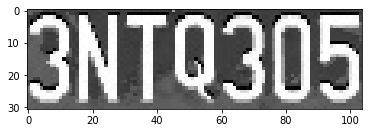

['5', 'C', 'D', 'X', '0', '6', '9']


In [ ]:
demo=[]
img_name = '/content/drive/MyDrive/test/demo.bmp'
img = tf.io.read_file(img_name)
img = tf.io.decode_bmp(img,0)
#img = img/255
img = np.reshape(img, (31, 104,3))
demo.append(img[:,:,0])

plt.figure()
plt.imshow(demo[0], cmap=plt.cm.binary)
#plt.imshow(img,cmap=plt.cm.binary)
plt.grid(False)
plt.show()

demo=np.array(demo).reshape((1, 31, 104, 1))
r0,r1,r2,r3,r4,r5,r6=model.predict(demo)
for k in range(1):#2052
  temp=max(r0[k])
  for i in range(36):
    if temp==r0[k][i]:
      number.append(conversion[i])

  temp=max(r1[k])
  for i in range(36):
    if temp==r1[k][i]:
     number.append(conversion[i])

  temp=max(r2[k])
  for i in range(36):
    if temp==r2[k][i]:
      number.append(conversion[i])

  temp=max(r3[k])
  for i in range(36):
    if temp==r3[k][i]:
       number.append(conversion[i])

  temp=max(r4[k])
  for i in range(36):
    if temp==r4[k][i]:
       number.append(conversion[i])

  temp=max(r5[k])
  for i in range(36):
    if temp==r5[k][i]:
      number.append(conversion[i])

  temp=max(r6[k])
  #print(r6[k])
  #print(temp)
  for i in range(36):
     if temp==r6[k][i]:
       number.append(conversion[i])
  print(number)
  
  for i in range(7):
    number.pop()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
extractor = keras.Model(inputs=model.inputs,outputs=[layer.output for layer in model.layers])
data= np.array(train_images[0]).reshape((1, 31, 104, 1))
features = extractor(data)
np.set_printoptions(threshold=np.inf)
print(features[0])
print(features[4])
print(features[5])

tf.Tensor(
[[[[112.]
   [145.]
   [148.]
   [172.]
   [163.]
   [189.]
   [184.]
   [203.]
   [200.]
   [202.]
   [200.]
   [197.]
   [192.]
   [174.]
   [199.]
   [192.]
   [202.]
   [197.]
   [195.]
   [199.]
   [183.]
   [204.]
   [194.]
   [161.]
   [165.]
   [155.]
   [160.]
   [166.]
   [165.]
   [162.]
   [157.]
   [148.]
   [142.]
   [152.]
   [137.]
   [143.]
   [139.]
   [144.]
   [136.]
   [157.]
   [151.]
   [167.]
   [158.]
   [158.]
   [163.]
   [142.]
   [159.]
   [134.]
   [141.]
   [144.]
   [168.]
   [165.]
   [163.]
   [149.]
   [166.]
   [169.]
   [174.]
   [175.]
   [175.]
   [159.]
   [166.]
   [149.]
   [157.]
   [162.]
   [155.]
   [179.]
   [168.]
   [174.]
   [181.]
   [171.]
   [180.]
   [187.]
   [181.]
   [172.]
   [167.]
   [163.]
   [160.]
   [170.]
   [177.]
   [172.]
   [175.]
   [191.]
   [187.]
   [191.]
   [188.]
   [191.]
   [208.]
   [188.]
   [182.]
   [207.]
   [192.]
   [190.]
   [198.]
   [191.]
   [193.]
   [187.]
   [188.]
   [182.]
   [187.]

In [ ]:
print(features[6])

tf.Tensor(
[[[[-2.34414577e-01 -9.70345616e-01 -7.78780699e-01 -9.05085742e-01
    -4.60285664e-01 -8.94426584e-01 -6.02678835e-01 -7.26845860e-01
    -6.30883753e-01 -2.59507179e-01 -5.51462352e-01 -7.61915863e-01
    -7.57460356e-01 -6.99600220e-01  5.22665787e+00 -2.87011981e-01]
   [-2.34414577e-01 -9.70345616e-01 -7.78780699e-01 -9.05085742e-01
    -4.60285664e-01 -8.94426584e-01 -5.80929458e-01 -7.26845860e-01
     1.56203532e+00 -2.59507179e-01 -5.51462352e-01 -7.61915863e-01
    -7.57460356e-01 -6.99600220e-01 -8.42350304e-01 -2.87011981e-01]
   [-2.34414577e-01 -9.70345616e-01 -7.78780699e-01 -9.05085742e-01
    -4.60285664e-01 -8.94426584e-01 -6.02678835e-01 -7.26845860e-01
     1.88265133e+00 -2.59507179e-01 -5.51462352e-01 -7.61915863e-01
    -7.57460356e-01 -6.99600220e-01 -8.42350304e-01 -2.87011981e-01]
   [-2.34414577e-01 -9.70345616e-01 -7.78780699e-01 -9.05085742e-01
    -4.60285664e-01  1.55445862e+00 -6.02678835e-01 -7.26845860e-01
     1.13082969e+00 -2.59507179e-0

In [ ]:
print(features[9])

tf.Tensor(
[[ 0.         0.         0.         0.        26.444437  16.36011
   0.         0.         0.         1.2596681 22.522676   0.
  20.95878    0.        10.559736   0.        13.606772   0.
   0.         0.         0.        27.987442  22.016472   3.2181208
  12.7205715  0.         0.         0.         0.         2.5154917
   0.        30.446167 ]], shape=(1, 32), dtype=float32)


In [ ]:
from sklearn.metrics import confusion_matrix
y_true2=[]
for i in range(2052):#2052
  y_true2.append(train_labels[i,1])

print(y_pred2)
print(y_true2)
t2=confusion_matrix(y_true2, y_pred2)
np.set_printoptions(threshold=np.inf)

f = open('report.txt', 'w')
f.write('Confusion Matrix\n\n{}\n'.format(t2))
f.close()

print(t2)

[16, 34, 12, 14, 22, 34, 13, 15, 15, 30, 30, 10, 16, 31, 15, 22, 31, 10, 14, 10, 25, 30, 13, 27, 16, 22, 17, 33, 30, 20, 10, 25, 16, 22, 25, 12, 17, 28, 33, 21, 16, 23, 17, 32, 21, 30, 16, 31, 29, 34, 28, 29, 28, 30, 19, 15, 12, 15, 23, 21, 29, 27, 22, 27, 25, 28, 16, 30, 30, 21, 15, 16, 12, 17, 17, 14, 22, 15, 10, 33, 29, 19, 14, 16, 28, 35, 15, 23, 15, 22, 14, 33, 22, 15, 30, 19, 29, 32, 21, 13, 30, 17, 19, 16, 33, 15, 12, 20, 16, 21, 22, 13, 12, 14, 17, 12, 12, 33, 28, 28, 25, 34, 22, 19, 33, 16, 22, 14, 17, 32, 34, 33, 22, 22, 13, 33, 19, 32, 27, 19, 21, 10, 28, 32, 30, 10, 31, 14, 20, 21, 12, 10, 21, 25, 33, 25, 13, 17, 32, 21, 16, 16, 13, 22, 14, 25, 32, 19, 32, 25, 28, 30, 13, 16, 30, 33, 10, 10, 16, 0, 25, 21, 0, 0, 16, 34, 14, 19, 19, 19, 19, 21, 19, 35, 10, 35, 10, 27, 28, 16, 17, 13, 16, 10, 19, 34, 19, 25, 16, 15, 10, 16, 28, 28, 35, 20, 20, 16, 10, 10, 22, 16, 14, 25, 30, 10, 28, 32, 10, 12, 10, 17, 13, 17, 27, 19, 28, 30, 31, 32, 23, 20, 12, 25, 29, 19, 31, 31, 16, 34, 16

<Figure size 2560x2560 with 0 Axes>

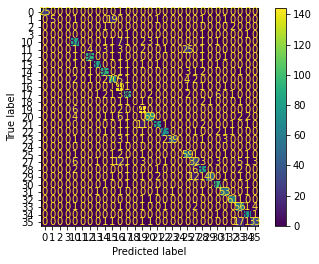

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import figure

figure(figsize=(32, 32), dpi=80)
ConfusionMatrixDisplay.from_predictions(y_true2, y_pred2)
#plt.savefig("tt1.pdf")
plt.show()

In [ ]:
y_true3=[]
for i in range(2052):#2052
  y_true3.append(train_labels[i,2])

print(y_pred3)
print(y_true3)
t3=confusion_matrix(y_true3, y_pred3)
np.set_printoptions(threshold=np.inf)
print(t3)

[15, 34, 27, 12, 13, 13, 10, 31, 34, 16, 16, 29, 16, 11, 18, 20, 3, 34, 19, 25, 34, 10, 34, 16, 34, 22, 15, 29, 16, 8, 34, 10, 16, 16, 24, 13, 35, 3, 29, 22, 10, 16, 34, 19, 15, 35, 34, 32, 19, 24, 29, 16, 16, 32, 26, 20, 18, 32, 15, 34, 28, 10, 14, 13, 18, 30, 32, 16, 32, 34, 18, 4, 13, 34, 22, 29, 34, 6, 20, 12, 29, 24, 34, 13, 13, 30, 35, 16, 15, 28, 19, 15, 11, 6, 17, 29, 28, 29, 18, 18, 6, 15, 20, 31, 18, 32, 29, 10, 16, 28, 16, 8, 20, 20, 15, 24, 24, 13, 27, 34, 20, 16, 31, 31, 18, 32, 21, 28, 22, 15, 21, 22, 29, 18, 16, 29, 26, 12, 29, 14, 28, 31, 31, 19, 10, 20, 29, 10, 28, 27, 16, 29, 32, 28, 22, 32, 21, 16, 15, 29, 28, 30, 29, 31, 30, 32, 16, 31, 29, 10, 20, 14, 29, 31, 13, 14, 27, 26, 28, 4, 34, 29, 4, 4, 21, 29, 27, 18, 18, 16, 23, 8, 31, 25, 31, 20, 34, 29, 3, 27, 16, 19, 25, 20, 29, 20, 28, 31, 22, 20, 20, 21, 25, 3, 35, 34, 19, 20, 29, 20, 31, 12, 14, 13, 32, 35, 10, 20, 23, 17, 13, 23, 31, 21, 20, 30, 28, 35, 32, 13, 13, 27, 22, 29, 19, 20, 11, 34, 34, 18, 32, 2, 28, 16

<Figure size 20480x20480 with 0 Axes>

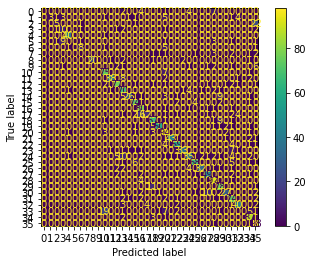

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import figure

figure(figsize=(256, 256), dpi=80)
ConfusionMatrixDisplay.from_predictions(y_true3, y_pred3)
#plt.savefig("tt1.pdf")
plt.show()

In [ ]:
y_true4=[]
for i in range(2052):#2052
  y_true4.append(train_labels[i,3])

print(y_pred4)
print(y_true4)
t4=confusion_matrix(y_true4, y_pred4)
np.set_printoptions(threshold=np.inf)
print(t4)

[13, 33, 10, 27, 16, 32, 12, 31, 22, 28, 28, 34, 19, 27, 33, 4, 4, 25, 20, 17, 35, 14, 13, 23, 30, 32, 14, 27, 25, 2, 19, 16, 20, 29, 28, 11, 20, 9, 23, 33, 27, 28, 35, 27, 12, 10, 10, 10, 35, 19, 17, 33, 13, 17, 15, 14, 27, 13, 22, 12, 19, 12, 28, 33, 9, 29, 35, 20, 13, 14, 19, 2, 21, 15, 22, 16, 13, 2, 33, 32, 25, 27, 30, 12, 10, 17, 17, 19, 14, 27, 27, 20, 31, 2, 13, 32, 22, 31, 27, 28, 10, 11, 10, 17, 34, 17, 17, 16, 19, 35, 11, 25, 13, 20, 12, 31, 31, 17, 12, 12, 12, 32, 19, 17, 32, 34, 31, 16, 22, 28, 34, 17, 34, 34, 27, 34, 20, 28, 23, 31, 19, 19, 17, 32, 17, 29, 34, 20, 35, 20, 30, 22, 31, 15, 12, 10, 31, 25, 33, 19, 10, 33, 19, 29, 16, 28, 27, 32, 13, 32, 27, 23, 22, 11, 22, 13, 33, 22, 15, 3, 29, 14, 3, 3, 35, 22, 23, 15, 25, 14, 14, 10, 23, 33, 13, 17, 19, 35, 9, 21, 11, 19, 31, 31, 17, 25, 16, 12, 10, 29, 23, 28, 22, 2, 17, 34, 35, 29, 22, 9, 33, 27, 15, 13, 20, 17, 21, 16, 10, 22, 34, 22, 12, 27, 16, 25, 34, 12, 17, 31, 10, 13, 16, 29, 35, 31, 27, 14, 10, 34, 35, 2, 21, 29

<Figure size 20480x20480 with 0 Axes>

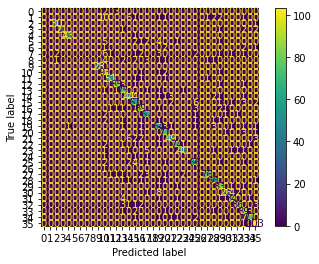

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import figure

figure(figsize=(256, 256), dpi=80)
ConfusionMatrixDisplay.from_predictions(y_true4, y_pred4)
#plt.savefig("tt1.pdf")
plt.show()

In [ ]:
#View the total number of parameters, so it doesn't overflow the LCDK's memory
print("Total amount of parameter of model is:", model.count_params())

Total amount of parameter of model is: 196804


In [ ]:
#Example for extract parameter form the first conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
t1, t2 = model.layers[1].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/w1.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/b1.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2 = model.layers[3].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/w2.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/b2.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2 = model.layers[5].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/w3.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/b3.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2, t3, t4= model.layers[6].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/scale.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/shift.txt', t2.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/mean.txt', t3.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/variance.txt', t4.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2 = model.layers[9].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc1.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc1.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[10].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc2.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc2.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[11].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc3.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc3.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[12].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc4.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc4.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[13].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc5.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc5.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[14].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc6.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc6.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[15].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/fc7.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/bc7.txt', t2.flatten(), delimiter=',',fmt='%.16f')

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2 = model.layers[23].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res1.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b1.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[24].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res2.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b2.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[25].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res3.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b3.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[26].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res4.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b4.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[27].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res5.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b5.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[28].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res6.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b6.txt', t2.flatten(), delimiter=',',fmt='%.16f')

t1, t2 = model.layers[29].get_weights()
np.savetxt('/content/drive/MyDrive/train_parameter/res7.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('/content/drive/MyDrive/train_parameter/res_b7.txt', t2.flatten(), delimiter=',',fmt='%.16f')